The original PyTorch lesson suggests SGD as the optimizer.

Obviously different problems require different solutions, but there are some 'defaults' that are better than others.
In this case, SGD is a very solid optimizer with less parameters to tune, but tends to be slower than others.

In [1]:
import torch
import torch.nn as nn

In [2]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [3]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
import typing


def train_loop(model: torch.nn.Module, optimizer: torch.optim.Optimizer, loss_fn, X_train: torch.Tensor, y_train: torch.Tensor,
                        X_test: torch.Tensor, y_test: torch.Tensor) -> typing.List[float]:
  # Set the number of epochs (how many times the model will pass over the training data)
  epochs = 100
  train_loss = []

  for epoch in range(epochs):
      ### Training

      # Put model in training mode (this is the default state of a model)
      model.train()

      # 1. Forward pass on train data using the forward() method inside 
      y_pred = model(X_train)
      # print(y_pred)

      # 2. Calculate the loss (how different are our models predictions to the ground truth)
      loss = loss_fn(y_pred, y_train)
      train_loss.append(loss.item())  # <- store the loss value for later

      # 3. Zero grad of the optimizer
      optimizer.zero_grad()

      # 4. Loss backwards
      loss.backward()

      # 5. Progress the optimizer
      optimizer.step()

      ### Testing

      # Put the model in evaluation mode
      model.eval()

  return train_loss

In [5]:
def gen_model() -> torch.nn.Module:
    torch.manual_seed(42)  # Set seed for reproducibility
    return LinearRegressionModel()

loss_fn = nn.L1Loss() # L1 loss (mean absolute error)

model = gen_model()
optimizer_0 = torch.optim.SGD(params=model.parameters(), lr=0.01) # Stochastic Gradient Descent optimizer with learning rate of 0.01
sgd_loss = train_loop(model=model, optimizer=optimizer_0, loss_fn=loss_fn, 
           X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

model = gen_model()
optimizer_1 = torch.optim.Adam(params=model.parameters(), lr=0.01) # Adam optimizer with learning rate of 0.01
adam_loss = train_loop(model=model, optimizer=optimizer_1, loss_fn=loss_fn,
              X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

model = gen_model()
optimizer_2 = torch.optim.RMSprop(params=model.parameters(), lr=0.01) # RMSprop optimizer with learning rate of 0.01
rmsprop_loss = train_loop(model=model, optimizer=optimizer_2, loss_fn=loss_fn,
                X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

model = gen_model()
optimizer_3 = torch.optim.NAdam(params=model.parameters(), lr=0.01) # NAdam optimizer with learning rate of 0.01
nadam_loss = train_loop(model=model, optimizer=optimizer_3, loss_fn=loss_fn,
                X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)


Let's see how the model training differs for different optimizerss

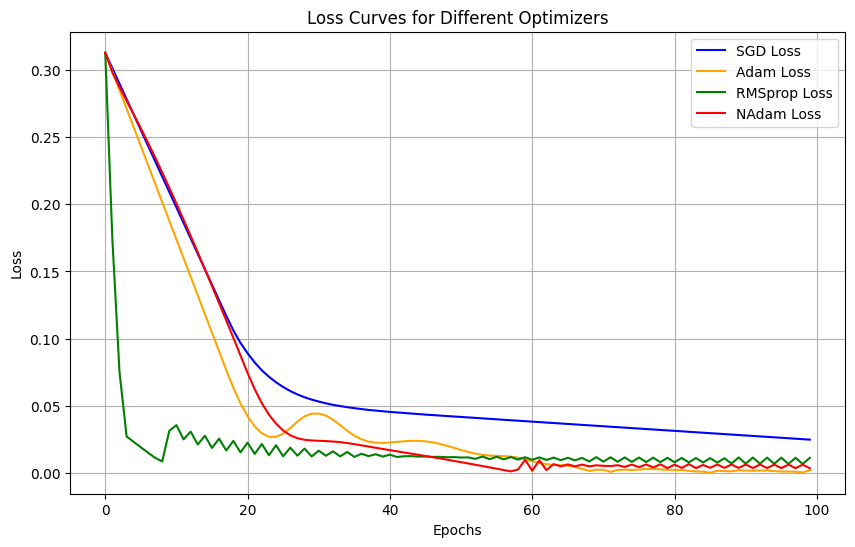

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(sgd_loss, label='SGD Loss', color='blue')
plt.plot(adam_loss, label='Adam Loss', color='orange')
plt.plot(rmsprop_loss, label='RMSprop Loss', color='green')
plt.plot(nadam_loss, label='NAdam Loss', color='red')
plt.title('Loss Curves for Different Optimizers')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

Overall, you can always adapt to your problem space, but I'd recommend starting any nn problem with adam, then adjusting if necessary